#### Machine Learning Project Exercise 

By:- Mohit Bokade

##### Use Machine learning to predict the price of a car based on several characteristics. The objective is to build a model to understand the factors that drive the car of the price. This will help your automobile company launch their new car in the market effectively by pricing it better.


In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
automobile_price = pd.read_csv('AutoData (1).csv')
automobile_price.head()

,symboling,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


### Perform EDA on the data

In [3]:
automobile_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   make              205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

#no missing values, All var's in correct format, however since symboling is a categorical var we need to change its type 

In [4]:
# converting symboling to categorical
automobile_price['symboling'] = automobile_price['symboling'].astype('object')
automobile_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    object 
 1   make              205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [5]:
automobile_price.shape

(205, 25)

In [6]:
automobile_price.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


### Perform Data Cleanup as required

In [7]:
automobile_price.columns

Index(['symboling', 'make', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [8]:
automobile_price['symboling'].value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

symbol: -2 (least risky) to +3 most risky.
Most cars are 0,1,2

In [9]:
# asperation: An (internal combustion) engine property showing
# whether the oxygen intake is through standard (atmospheric pressure)
# or through turbocharging (pressurised oxygen intake)
automobile_price['aspiration'].value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

In [10]:
# Drivewheel: frontwheel, real wheel or four-wheel drive
automobile_price['drivewheel'].value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

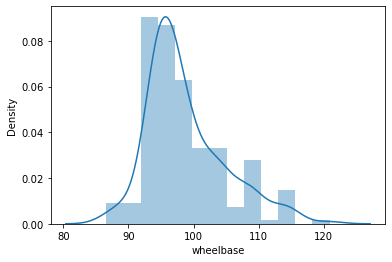

In [11]:
# wheelbase: distance between centre of front and rear wheels
sns.distplot(automobile_price['wheelbase']);

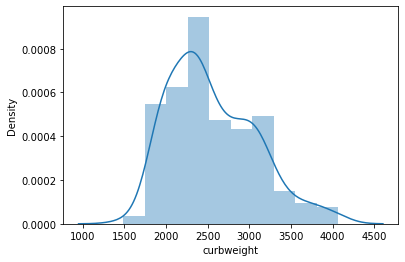

In [12]:
# curbweight: weight of car without occupants or baggage
sns.distplot(automobile_price['curbweight']);

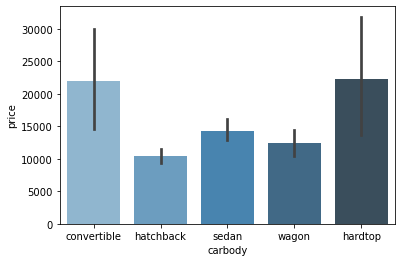

In [13]:
sns.barplot(x='carbody',y='price',data=automobile_price,palette = "Blues_d");

carbody: Hardtop and convertible are the most expensive whereas hatchbacks are the cheapest.

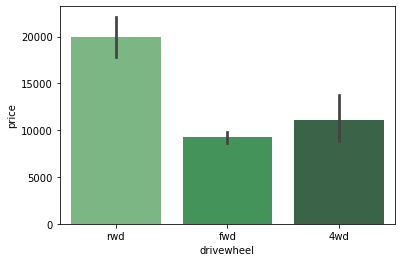

In [14]:
sns.barplot(x='drivewheel',y='price',data=automobile_price,palette='Greens_d');

drivewheel: Cars with Rear wheel drive have a higher price value.

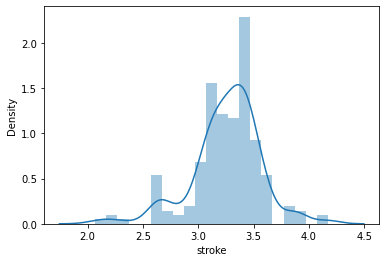

In [15]:
#stroke: volume of the engine (the distance traveled by the piston in each cycle)
sns.distplot(automobile_price['stroke']);

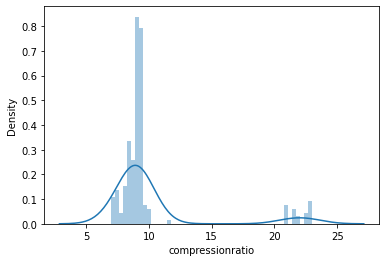

In [16]:
# compression ration: ration of volume of compression chamber at largest capacity to least capacity
sns.distplot(automobile_price['compressionratio']);

In [17]:
#A single variable mileage can be calculated taking the weighted average of 55% city and 45% highways.
automobile_price['mileage'] = automobile_price['citympg']*0.55 + automobile_price['highwaympg']*0.45

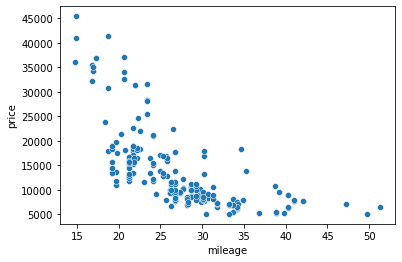

In [18]:
# Lets see how price varies with mileage. 
sns.scatterplot(x='mileage',y='price',data=automobile_price);

Mileage: Mileage has a negative correlation with price.

In [19]:
automobile_price.make.values[0:10]

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 100ls', 'audi 5000', 'audi 4000',
       'audi 5000s (diesel)'], dtype=object)

In [20]:
automobile_price['make']

0            alfa-romero giulia
1           alfa-romero stelvio
2      alfa-romero Quadrifoglio
3                   audi 100 ls
4                    audi 100ls
                 ...           
200             volvo 145e (sw)
201                 volvo 144ea
202                 volvo 244dl
203                   volvo 246
204                 volvo 264gl
Name: make, Length: 205, dtype: object

It is observed that Car Name consists of two parts 'car company' + ' ' + 'Car Model'
Let's split out car company to a new column.

In [21]:
automobile_price['brand'] = automobile_price.make.str.split(' ').str.get(0).str.upper()

In [22]:
automobile_price[['make', 'brand']]

,make,brand
0,alfa-romero giulia,ALFA-ROMERO
1,alfa-romero stelvio,ALFA-ROMERO
2,alfa-romero Quadrifoglio,ALFA-ROMERO
3,audi 100 ls,AUDI
4,audi 100ls,AUDI
...,...,...
200,volvo 145e (sw),VOLVO
201,volvo 144ea,VOLVO
202,volvo 244dl,VOLVO
203,volvo 246,VOLVO


In [23]:
len(set(automobile_price.brand.values))

27

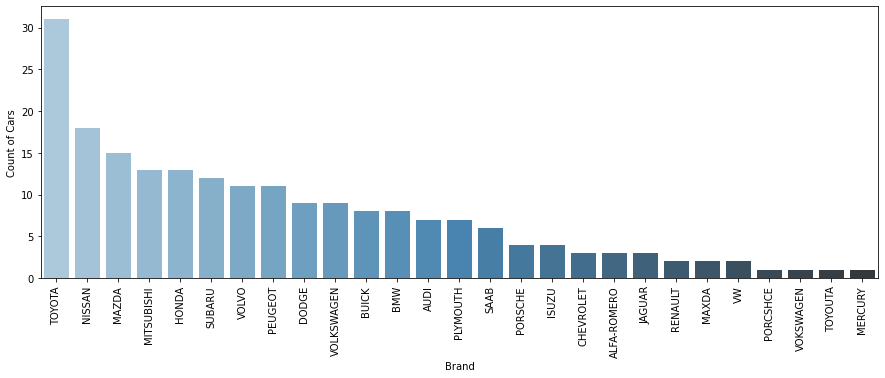

In [24]:
#Lets see companies and there no of models.
ax = plt.subplots(figsize = (15,5))
plt1 = sns.countplot(automobile_price['brand'],order = pd.value_counts(automobile_price['brand']).index,palette = 'Blues_d')
plt1.set(xlabel = 'Brand',ylabel = 'Count of Cars')
plt.xticks(rotation = 90)
plt.show()

In [25]:
# Its noticed that in brand names,
# VOLKSWAGON has three different values as VOLKSWAGEN, VOKSWAGEN and VW
#PORCHE AS PORCSCHE.
# Let's fix these data issues.

automobile_price['brand'] = automobile_price['brand'].replace(['VW','VOKSWAGEN'],'VOLKSWAGEN')
automobile_price['brand'] = automobile_price['brand'].replace(['PORCSCHE','PORCSHCE','PORSCHE'],'PORCHE')
automobile_price['brand'] = automobile_price['brand'].replace(['maxda','MAXDA','mazda'],'MAZDA')
automobile_price['brand'] = automobile_price['brand'].replace(['TOYOUTA'],'TOYOTA')
automobile_price['brand'].value_counts()


TOYOTA         32
NISSAN         18
MAZDA          17
MITSUBISHI     13
HONDA          13
SUBARU         12
VOLKSWAGEN     12
VOLVO          11
PEUGEOT        11
DODGE           9
BMW             8
BUICK           8
PLYMOUTH        7
AUDI            7
SAAB            6
PORCHE          5
ISUZU           4
JAGUAR          3
ALFA-ROMERO     3
CHEVROLET       3
RENAULT         2
MERCURY         1
Name: brand, dtype: int64

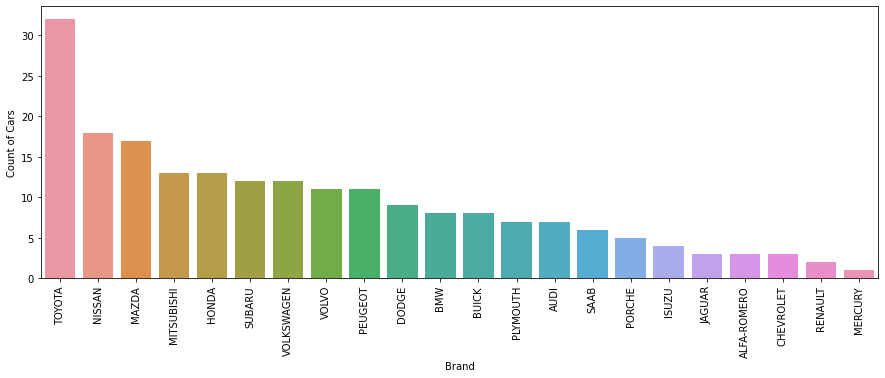

<Figure size 432x288 with 0 Axes>

In [26]:
ax = plt.subplots(figsize = (15,5))
plt1 = sns.countplot(automobile_price['brand'],order = pd.value_counts(automobile_price['brand']).index,)
plt1.set(xlabel = 'Brand',ylabel = 'Count of Cars')
plt.xticks(rotation = 90)
plt.show()
plt.tight_layout()

In [27]:
automobile_price.brand.describe()

count        205
unique        22
top       TOYOTA
freq          32
Name: brand, dtype: object

Toyota, a Japanese company has the most no of models.

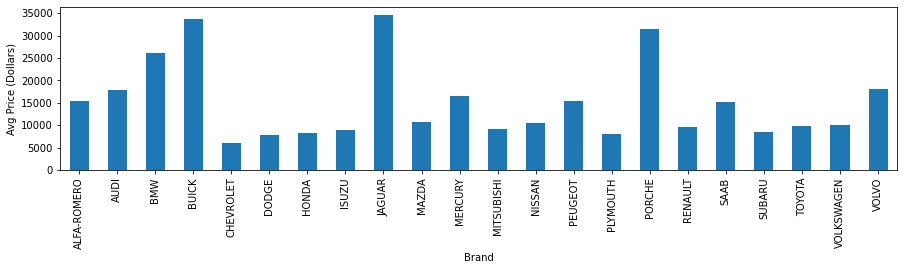

In [28]:
# Let's see average car price of each company.
automobile_price_comp_avg_price = automobile_price[['brand','price']].groupby("brand", as_index = False).mean().rename(columns={'price':'brand_avg_price'})
plt1 = automobile_price_comp_avg_price.plot(x = 'brand', kind='bar',legend = False, sort_columns = True, figsize = (15,3))
plt1.set_xlabel("Brand")
plt1.set_ylabel("Avg Price (Dollars)")
plt.xticks(rotation = 90)
plt.show()

In [29]:
#df_comp_avg_price
automobile_price = automobile_price.merge(automobile_price_comp_avg_price, on = 'brand')

In [30]:
automobile_price

,symboling,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,mileage,brand,brand_avg_price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,2.68,9.0,111,5000,21,27,13495.0,23.70,ALFA-ROMERO,15498.333333
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,2.68,9.0,111,5000,21,27,16500.0,23.70,ALFA-ROMERO,15498.333333
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,3.47,9.0,154,5000,19,26,16500.0,22.15,ALFA-ROMERO,15498.333333
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,3.40,10.0,102,5500,24,30,13950.0,26.70,AUDI,17859.166714
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,3.40,8.0,115,5500,18,22,17450.0,19.80,AUDI,17859.166714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,...,3.15,9.5,114,5400,23,28,16845.0,25.25,VOLVO,18063.181818
201,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,3.15,8.7,160,5300,19,25,19045.0,21.70,VOLVO,18063.181818
202,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,...,2.87,8.8,134,5500,18,23,21485.0,20.25,VOLVO,18063.181818
203,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,3.40,23.0,106,4800,26,27,22470.0,26.45,VOLVO,18063.181818


In [31]:
automobile_price['brand_category'] = automobile_price['brand_avg_price'].apply(lambda x : "Budget" if x < 10000 
                                                     else ("Mid_Range" if 10000 <= x < 20000
                                                           else "Luxury"))

In [32]:
automobile_price

,symboling,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,mileage,brand,brand_avg_price,brand_category
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,9.0,111,5000,21,27,13495.0,23.70,ALFA-ROMERO,15498.333333,Mid_Range
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,9.0,111,5000,21,27,16500.0,23.70,ALFA-ROMERO,15498.333333,Mid_Range
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,9.0,154,5000,19,26,16500.0,22.15,ALFA-ROMERO,15498.333333,Mid_Range
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,10.0,102,5500,24,30,13950.0,26.70,AUDI,17859.166714,Mid_Range
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,8.0,115,5500,18,22,17450.0,19.80,AUDI,17859.166714,Mid_Range
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,...,9.5,114,5400,23,28,16845.0,25.25,VOLVO,18063.181818,Mid_Range
201,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,8.7,160,5300,19,25,19045.0,21.70,VOLVO,18063.181818,Mid_Range
202,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,...,8.8,134,5500,18,23,21485.0,20.25,VOLVO,18063.181818,Mid_Range
203,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,23.0,106,4800,26,27,22470.0,26.45,VOLVO,18063.181818,Mid_Range


In [ ]:
automobile_price.drop(['brand_avg_price_x', 'brand_avg_price_y'], axis = 1,inplace=False)

Toyota has considerably high no of models in the market. Brands can be categorised as Luxury, Mid Ranged, Budget based on their average price. Some of the Luxury brand are

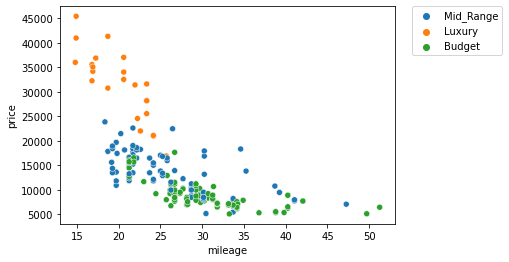

In [34]:
# Brand Category - Mileage : It is expected that luxury brands don't care about mileage. 
# Let's find out how price varies with brand category and mileage.
sns.scatterplot(x = 'mileage', y = 'price', hue = 'brand_category', data = automobile_price);
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

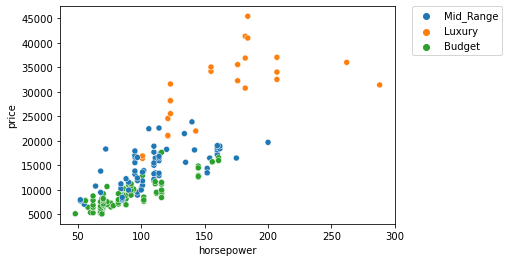

In [35]:
# Brand Category - Horsepower : It is expected that luxury brands have more horse power. 
# Let's find out how price varies with brand category and horse power.
sns.scatterplot(x = 'horsepower', y = 'price', hue = 'brand_category', data = automobile_price);
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

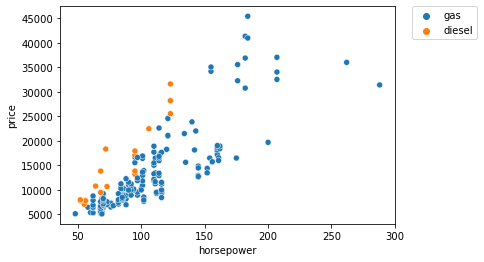

In [36]:
# Horsepower - Fuel Type : 
# Let's find out how price varies with brand category and horse power.
sns.scatterplot(x = 'horsepower', y = 'price', hue = 'fueltype', data = automobile_price);
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

# Simple Linear Regression:- Model 1

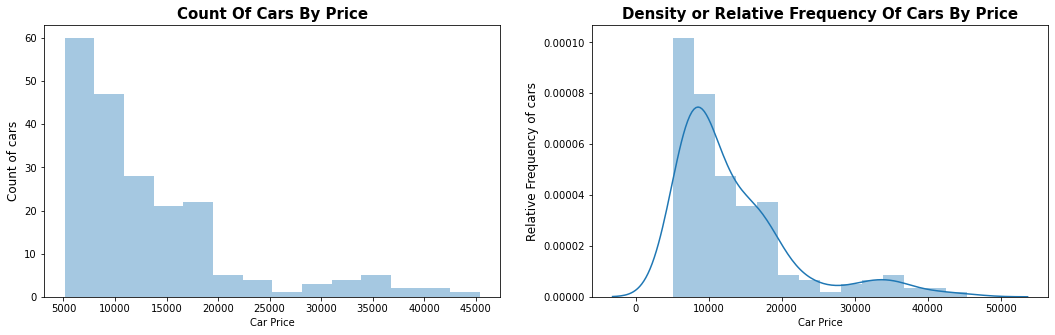

In [37]:
# target variable: price of car

fig, ax= plt.subplots(1,2,figsize=(18,5))

sns.distplot(automobile_price['price'], norm_hist=False, kde=False, ax=ax[0])
ax[0].set_xlabel('Car Price')
ax[0].set_ylabel('Count of cars',size=12)
ax[0].set_title('Count Of Cars By Price',size=15,weight="bold")

sns.distplot(automobile_price['price'], kde=True, ax=ax[1])
ax[1].set_xlabel('Car Price')
ax[1].set_ylabel('Relative Frequency of cars',size=12)
ax[1].set_title('Density or Relative Frequency Of Cars By Price',size=15,weight="bold");

## Observations on Target Variable- Price:
    1. The target variable price has a positive skew, however majority of the cars are low priced.
    2. More than 50% of the cars (around 105-107 out of total of 205) are priced 10,000 and close to 35% cars are priced between 10,000 and 20,000. So around 85% of cars in US market are priced between 5,000 to 20,000.
    3. Based on above observations and graph on right side (KDE/green one) it appears there are 2 distributions one for cars priced between 5,000 and 25000 and another distribution for high priced cars 25,000 and above. (Notice the approximate bell curve from little less than 30000 upto 45,000/50,000)


To perform linear regression, the target variable should be linearly related to independent variables. Let's see whether that's true in this case.

In [38]:
#creating df  with numeric var's only
automobile_price_numeric= automobile_price.select_dtypes(include=['float64','int64'])
automobile_price_numeric.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,mileage,brand_avg_price
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,23.70,15498.333333
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,23.70,15498.333333
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,22.15,15498.333333
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,26.70,17859.166714
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,19.80,17859.166714


<Figure size 1440x720 with 0 Axes>

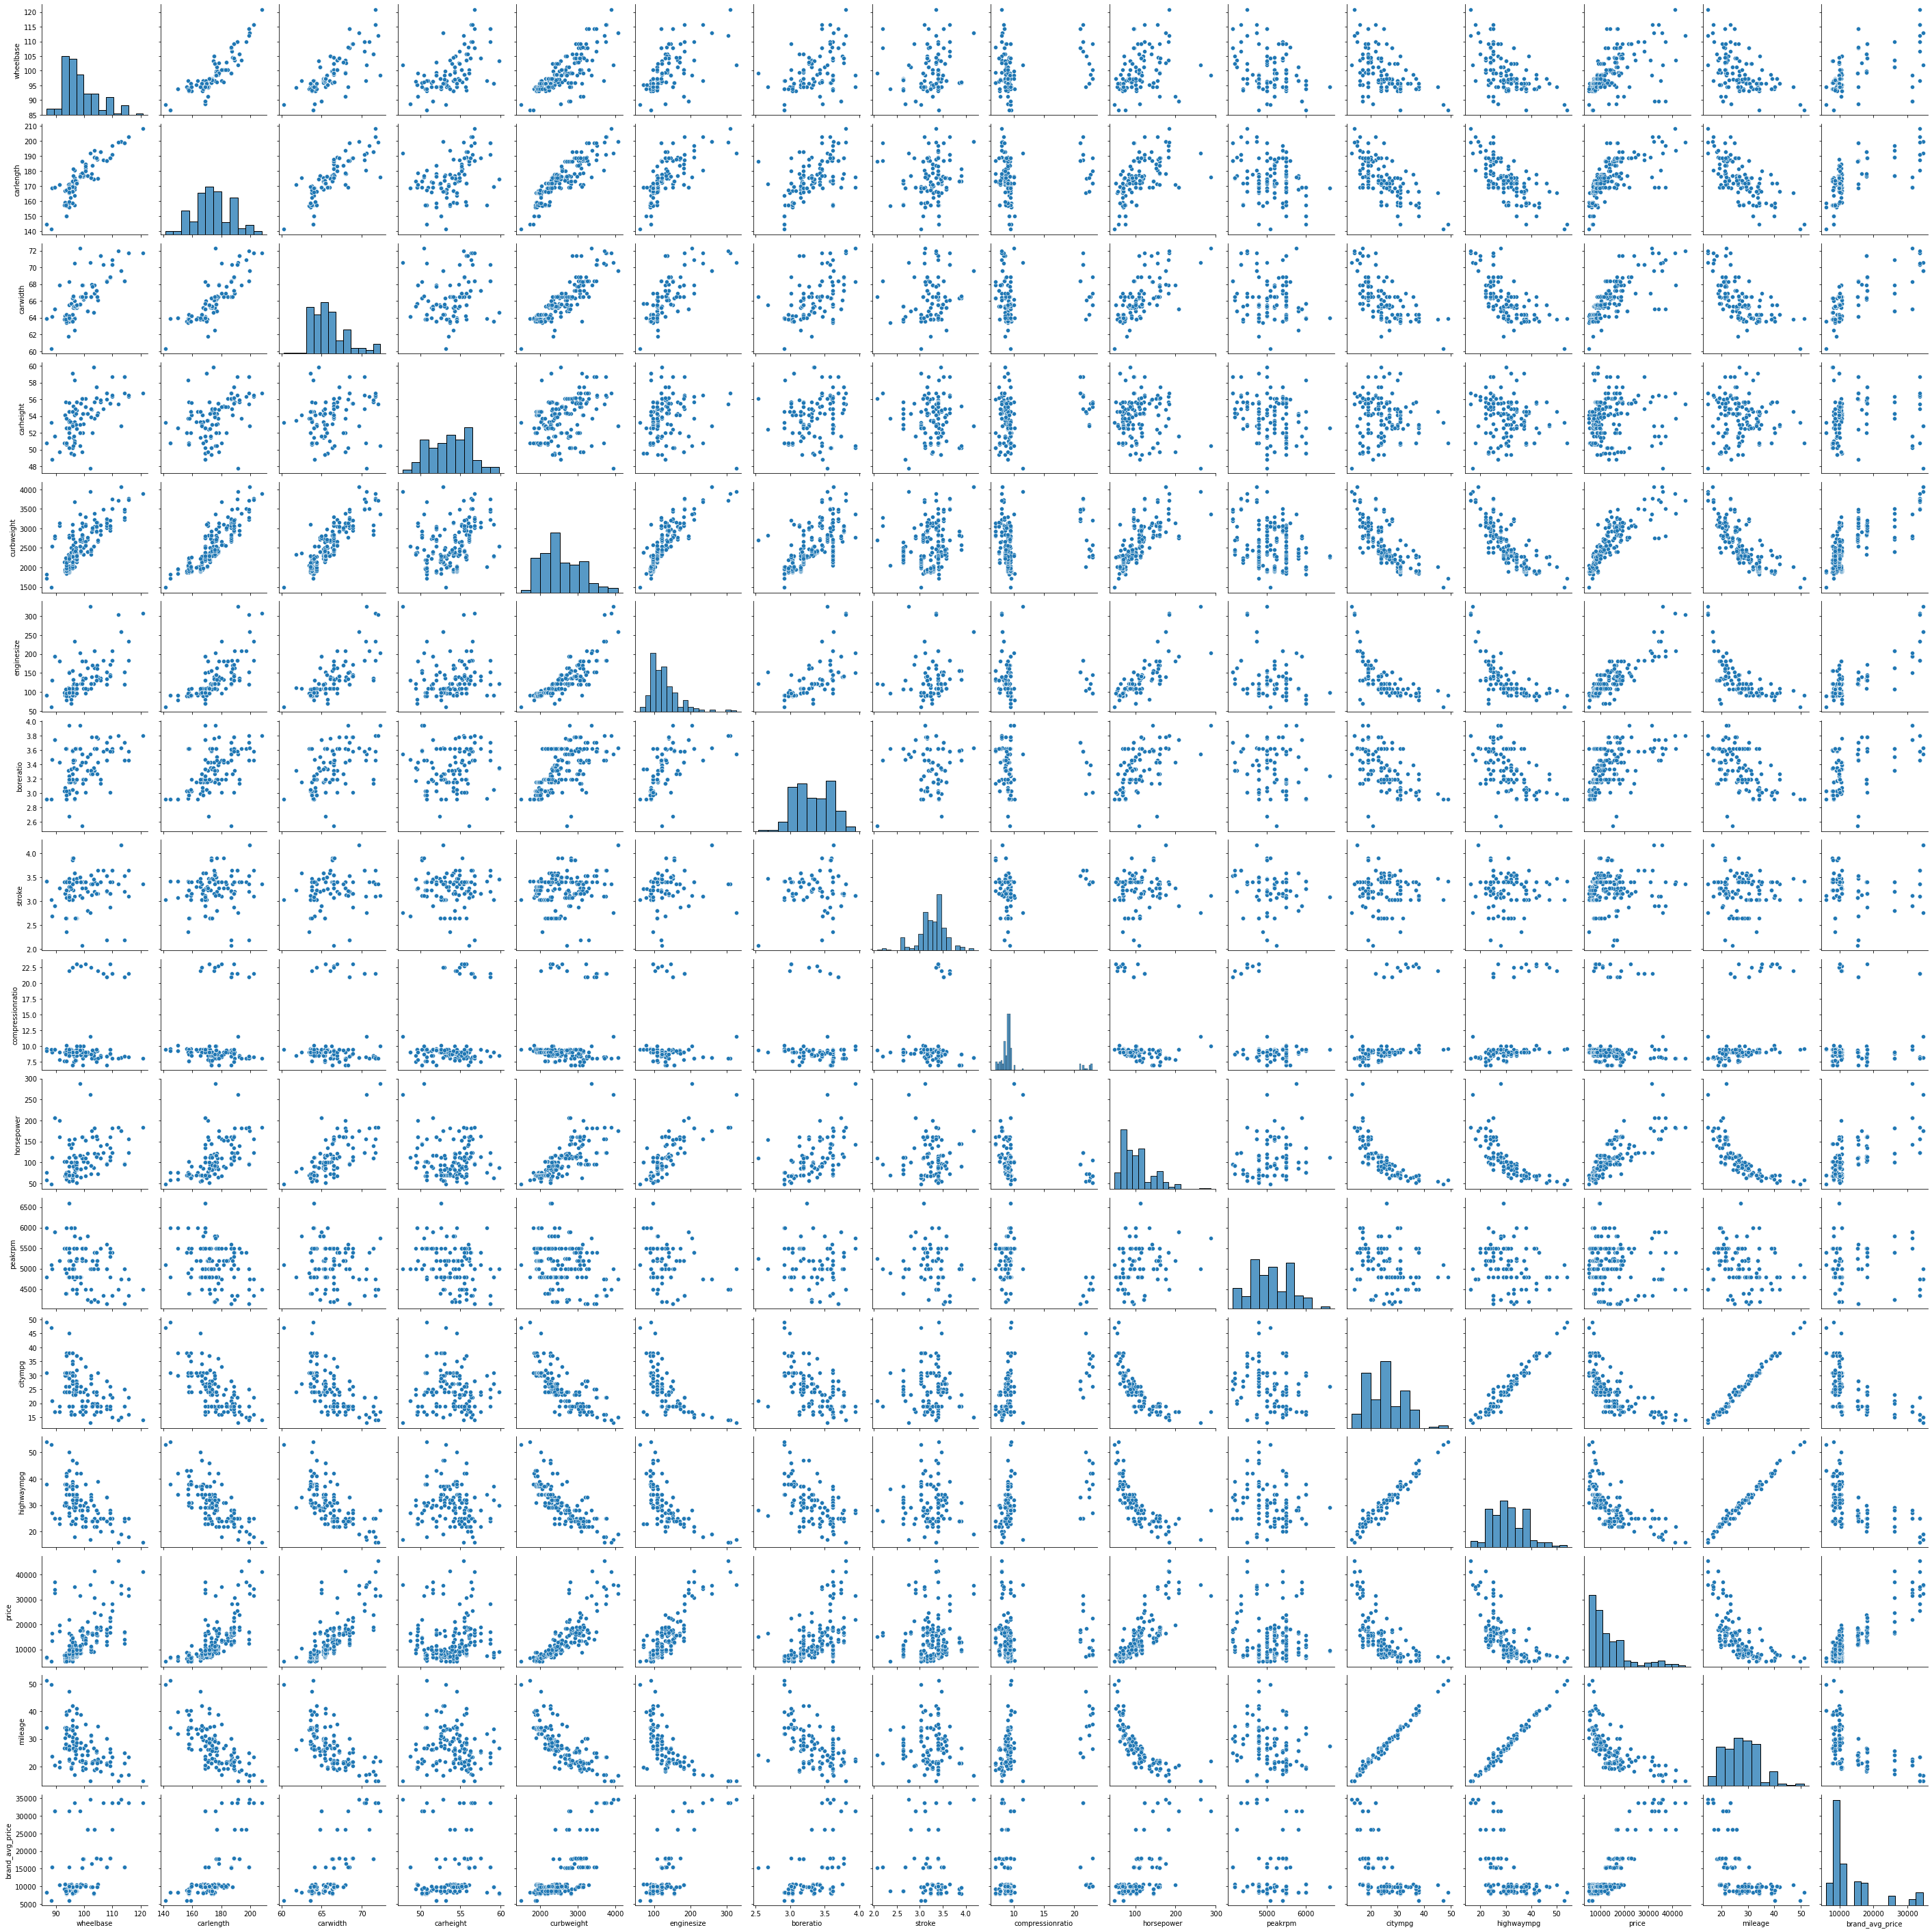

In [39]:
# pairwise scatter plot
plt.figure(figsize=(20, 10))
sns.pairplot(automobile_price_numeric);

as we can see its difficult to interpret these graphs due to so many of them
a BETTER way of checking linearity is in below cell

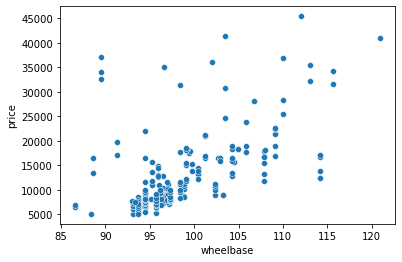

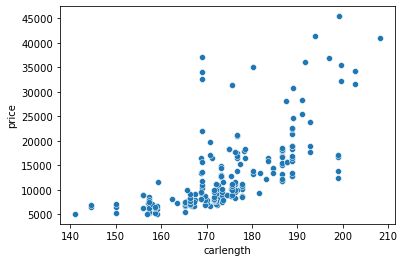

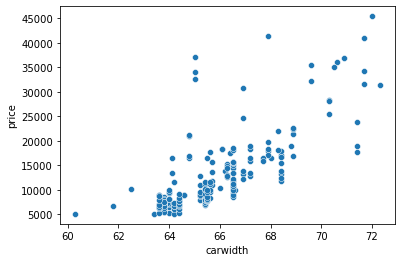

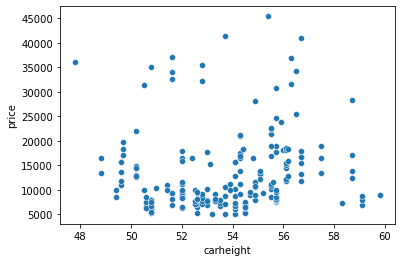

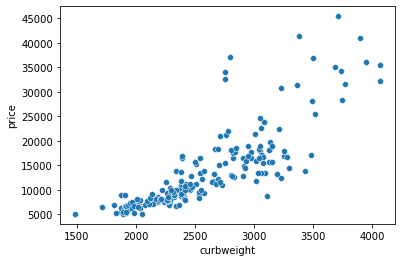

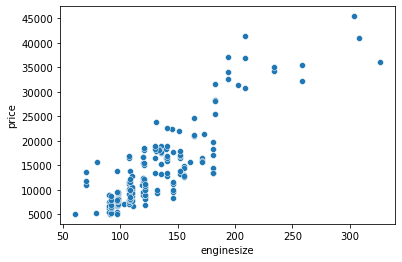

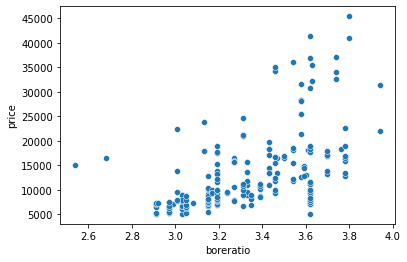

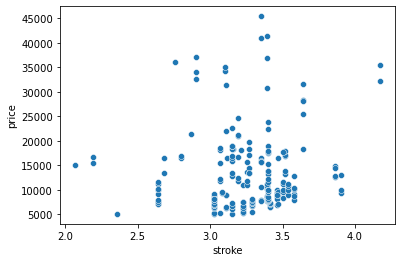

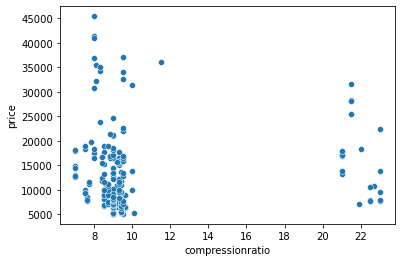

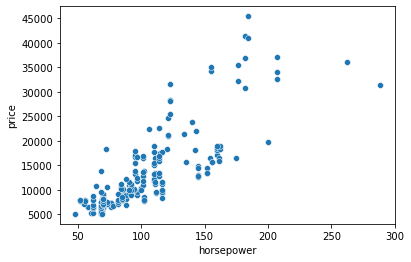

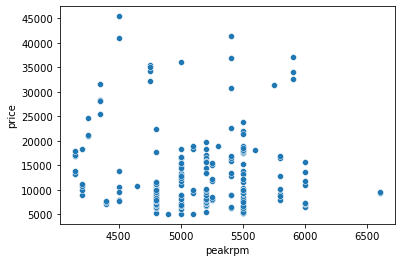

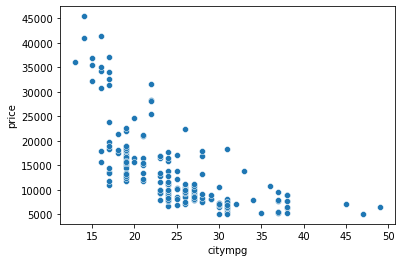

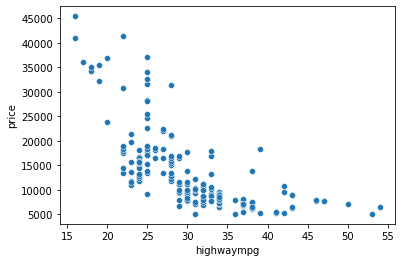

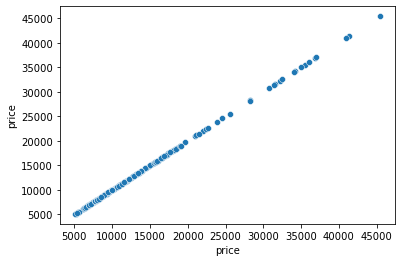

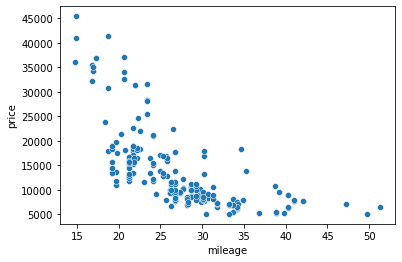

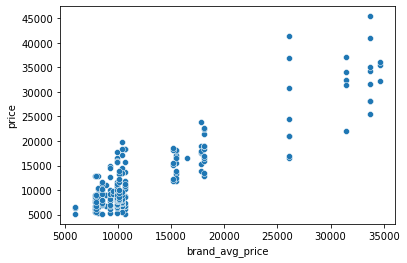

In [40]:
#LINEARITY CHECK>>>#to check price has linear relation or not with Indep. var's

for i, col in enumerate (automobile_price_numeric.columns):
    plt.figure(i)
    sns.scatterplot(x=automobile_price_numeric[col],y=automobile_price_numeric['price'])

These var's appears to have a linear relation with price: carwidth, curbweight, enginesize, horsepower, boreration and citympg.

Other variables either don't have a relation with price or relationship isn't strong. None of the varibales appear to have polynomial relation with price.

In linear regression assumptions validation section we will check for linearity assumption in detail

<AxesSubplot:>

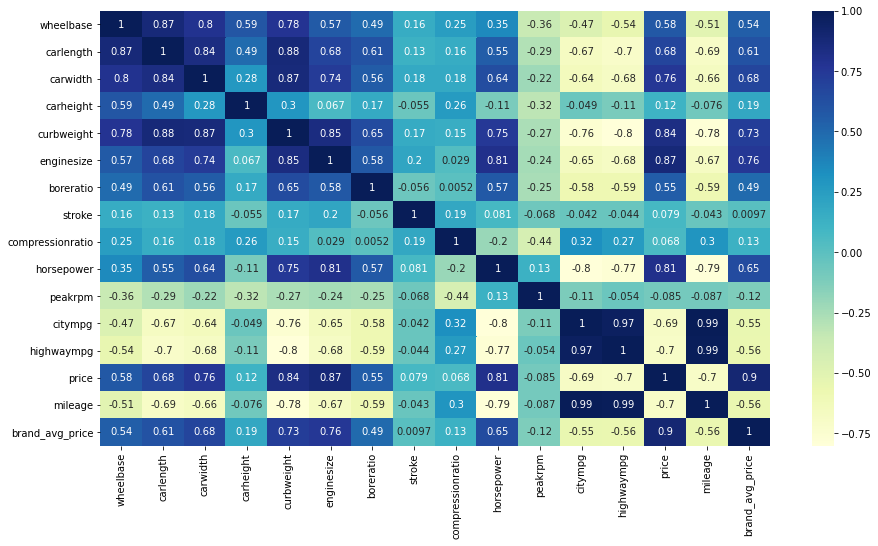

In [41]:
#CREATING CORELATION MATRIX TO DECIDE WHAT TO choose
corr=automobile_price_numeric.corr()

plt.figure(figsize=(15,8))
sns.heatmap(corr,annot=True,cmap="YlGnBu")

## Useful insights
#### 1.Dependent var and indep. var's
    Positive corr: Price highly correlated with enginesize, curbweight, horsepower, carwidth (all of these variables represent the size/weight/engine power of the car)

    Negative corr: Price negatively corr with mpg (miles per gallon) var's citympg highwaympg and Mileage. 
    This suggest that cars having high mileage may fall in the 'economy' cars category or in other words indicates that Low priced cars have mostly high mpg

##### 2. Correlation among independent variables:
    Many independent variables are highly correlated; wheelbase, carlength, curbweight, enginesize etc. are all measures of 'size/weight', and are positively correlated

    Since indep. var's are highly correlated (more than 80% corr among many of them ) we'll have to pay attention to multicollinearity, which we will check in assumptions validation section using VIF score.

# Liner Regression Model 1

In [42]:
A=automobile_price['enginesize']
B=automobile_price['price']

SPLITING TEST TRAIN DATASET

In [43]:
A_train,A_test,B_train,B_test=train_test_split(A,B,random_state =31)

In [44]:
A_train.head()

88     110
74     304
189    109
173    122
48     258
Name: enginesize, dtype: int64

In [45]:
A_train = A_train.values.reshape(-1,1)
A_test = A_test.values.reshape(-1,1)

B_train = B_train.values.reshape(-1,1)
B_test = B_test.values.reshape(-1,1)

In [46]:
reg = LinearRegression()
reg.fit(A_train,B_train)

LinearRegression()

In [47]:
print(reg.intercept_)
print(reg.coef_)

[-8008.74723113]
[[167.29904396]]


Take Away

THUS THE LINEAR LINE EQUATION IS Y=MX+C
THUS y=166x+(-7927) equation of linear line.
with M=166(APPROX)
AND C=-7927(APPROX)

R VALUE FOR PIKACHU MODEL WHILE TRAINING:
0.7707390596714485


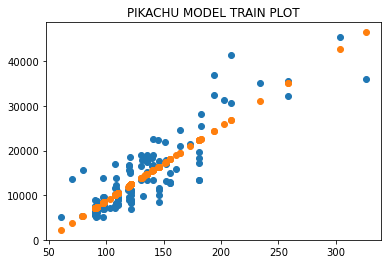

In [48]:
#This is the R2 Score of the test data set 

B_pred_train=reg.predict(A_train)

print("R VALUE FOR PIKACHU MODEL WHILE TRAINING:")
print(r2_score(B_train,B_pred_train))

#Plotting scatter graph 
plt.scatter(x = A_train,y= B_train)
plt.scatter(x=A_train,y= B_pred_train)
plt.title("PIKACHU MODEL TRAIN PLOT")
plt.show()

# Build model using best variable and report the R2

R VALUE FOR PIKACHU MODEL WHILE TESTING:
0.745489690086427


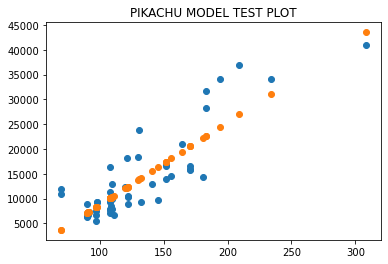

In [49]:
#This is the R2 Score of the train data set 
B_test_pred=reg.predict(A_test)
print("R VALUE FOR PIKACHU MODEL WHILE TESTING:")
print(r2_score(B_test,B_test_pred))

plt.scatter(x = A_test,y= B_test)
plt.scatter(x=A_test,y= B_test_pred) 
plt.title("PIKACHU MODEL TEST PLOT")
plt.show()

There is alot of outliers in here but we can always make use of R2 square

In [50]:
automobile_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    object 
 1   make              205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

NOW GOING FOR THE MULTIPLE REGRESSION MODEL AS THERE WERE A LOT OF OUTLIERS AND THE MODEL WASNT PERFECT FOR LINEAR REGRESSION

# MULTIPLE REGRESSION MODEL:2

#### 1 Applying the feature selection approaches as discussed in the class:

In [51]:
#using get_dummies fuction as it will convert catagorical variables as understoodable and numerical
data_carbody =pd.get_dummies(automobile_price.carbody)
data_carbody

,convertible,hardtop,hatchback,sedan,wagon
0,1,0,0,0,0
1,1,0,0,0,0
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
200,0,0,0,1,0
201,0,0,0,1,0
202,0,0,0,1,0
203,0,0,0,1,0


In [52]:
# We will need N-1 dummies

data_carbody =pd.get_dummies(automobile_price.carbody,prefix='body',drop_first=True,)
data_carbody

,body_hardtop,body_hatchback,body_sedan,body_wagon
0,0,0,0,0
1,0,0,0,0
2,0,1,0,0
3,0,0,1,0
4,0,0,1,0
...,...,...,...,...
200,0,0,1,0
201,0,0,1,0
202,0,0,1,0
203,0,0,1,0


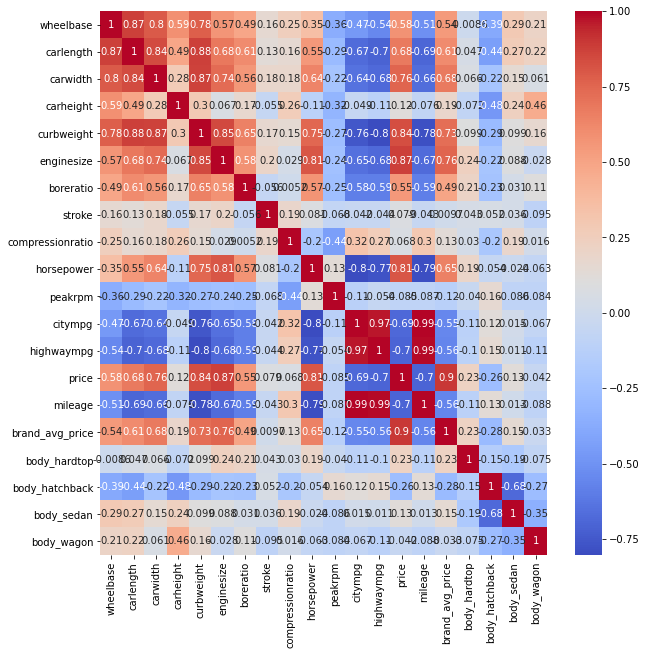

In [95]:
# Creating a Heat Map to get the correlation measure between the variables:
data_sample =pd.concat([automobile_price,data_carbody],axis=1)
correlation=data_sample.corr()

plt.figure(figsize=(10,10))
sns.heatmap(correlation,annot=True,cmap = 'coolwarm')
plt.show()

In [54]:
data_sample.head()

,symboling,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,highwaympg,price,mileage,brand,brand_avg_price,brand_category,body_hardtop,body_hatchback,body_sedan,body_wagon
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,27,13495.0,23.70,ALFA-ROMERO,15498.333333,Mid_Range,0,0,0,0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,27,16500.0,23.70,ALFA-ROMERO,15498.333333,Mid_Range,0,0,0,0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,26,16500.0,22.15,ALFA-ROMERO,15498.333333,Mid_Range,0,1,0,0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,30,13950.0,26.70,AUDI,17859.166714,Mid_Range,0,0,1,0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,22,17450.0,19.80,AUDI,17859.166714,Mid_Range,0,0,1,0


In [102]:
list(data_sample.select_dtypes(include ='object'))

['symboling',
 'make',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem',
 'brand',
 'brand_category']

In [104]:
# The categorical Data is not needed, so dropping all of it as follows:
Numerical_data = data_sample.drop(['symboling','make','fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem','brand','brand_category'], axis = 1)

In [105]:
Numerical_data

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,mileage,brand_avg_price,body_hardtop,body_hatchback,body_sedan,body_wagon
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,23.70,15498.333333,0,0,0,0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,23.70,15498.333333,0,0,0,0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,22.15,15498.333333,0,1,0,0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,26.70,17859.166714,0,0,1,0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,19.80,17859.166714,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0,25.25,18063.181818,0,0,1,0
201,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0,21.70,18063.181818,0,0,1,0
202,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0,20.25,18063.181818,0,0,1,0
203,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0,26.45,18063.181818,0,0,1,0


dependent and independent variables for multiple regression

In [106]:
X=Numerical_data.drop(columns=['price'])
y=Numerical_data.price

In [107]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state =31)
reg= LinearRegression()
reg.fit(X_train,y_train)
multi_model = LinearRegression()
multi_model.fit (X_train,y_train)
#print(multi_model.intercept_)
#print(multi_model.coef_)

y_pred_train =multi_model.predict(X_train)

y_pred_test =multi_model.predict(X_test)


print("Mean-Squared-Error of DRAKULA MODEL on training data:{}".format(mean_squared_error(y_train,y_pred_train)))
print("R-sqaure of DRAKULA MODEL on training data: {}".format(r2_score(y_train, y_pred_train)))

print("Mean-Squared-Error of DRAKULA MODEL on test data:{}".format(mean_squared_error(y_test,y_pred_test)))
print("R-sqaure of DRAKULA MODEL on test data: {}".format(r2_score(y_test, y_pred_test)))

Mean-Squared-Error of DRAKULA MODEL on training data:4846502.249523486
R-sqaure of DRAKULA MODEL on training data: 0.919879458074806
Mean-Squared-Error of DRAKULA MODEL on test data:4960814.885441737
R-sqaure of DRAKULA MODEL on test data: 0.9308758612562159


# Conclusion 

### What is your understanding of the factors that drive price?

# ACCOURDING TO THE MODELS R VALUES FOR
1. LINER REGRESSION MODEL 1 WHILE TRAINING: 0.7707390596714485
2. LINER REGRESSION MODEL 1 WHILE TESTING: 0.745489690086427
3. MULTIPLE REGRESSION MODEL 2 on training data: 0.919879458074806
4. MULTIPLE REGRESSION MODEL 2 on test data: 0.9308758612562159

#### FROM THE R VALUES OF BOTH THE MODEL IT IS CLEAR THAT MULTIPLE REGRESSION MODEL 2 IS CLEARLY BETTER.
#### THUS WE CAN NOW FINALLY STATE THAT THE PRICE OF THE CAR IS NOT JUST DEPENDING ON ONE INDEPENDENT VARIABLE IT'S LINEARLY DEPENDENT TO MULTIPLE INDEPENDENT VARIABLES